Generated Points:
 [[0.7845937  0.40723738 0.87946471]
 [0.29138748 0.14175934 0.94105175]
 [0.55986886 0.33021237 0.82876855]
 [0.38562833 0.35315252 0.47348964]
 [0.44474119 0.74115282 0.31339988]
 [0.51858064 0.04095521 0.64047934]
 [0.18812598 0.9722749  0.54071149]
 [0.11061789 0.01411556 0.7051452 ]
 [0.20596065 0.6977122  0.22449157]
 [0.52515266 0.43242334 0.55010668]]

Point Information and Computed Vectors:

Point 0:
  Original Vectors (v1, v2):
    v1 = [-0.22472484 -0.07702501 -0.05069616]
    v2 = [-0.25944103  0.02518596 -0.32935803]
  Cross Product:
    [ 0.02664564 -0.06086227 -0.02564336]
  Rank of [v1, v2, Cross Product]: 3 (Expected: 3 for linear independence)
  Lie Bracket:
    [ 0.02664564 -0.06086227 -0.02564336]
  Rank of [v1, v2, Lie Bracket]: 3 (Expected: 3 for linear independence)

Point 1:
  Original Vectors (v1, v2):
    v1 = [-0.18076959 -0.12764378 -0.23590654]
    v2 = [ 0.26848138  0.18845303 -0.1122832 ]
  Cross Product:
    [ 0.05878956 -0.0836339   0.

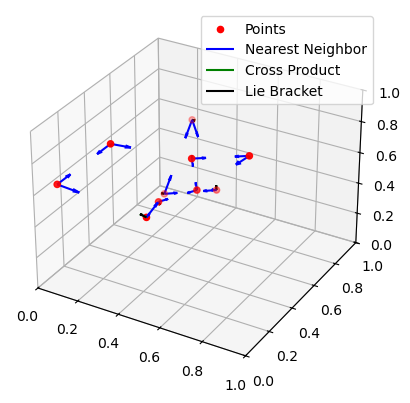

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance

def generate_points(num_points=10):
    return np.random.rand(num_points, 3)

def find_nearest_neighbors(points, k=2):
    dist_matrix = distance.cdist(points, points, 'euclidean')
    np.fill_diagonal(dist_matrix, np.inf)
    indices = np.argsort(dist_matrix, axis=1)[:, :k]
    return indices

def compute_vectors(points, neighbors):
    vectors = []
    for i, point in enumerate(points):
        nearest_points = points[neighbors[i]]
        vecs = nearest_points - point
        vectors.append(vecs)
    return np.array(vectors)

def cross_product(v1, v2):
    return np.cross(v1, v2)

def so3_bracket(v1, v2):
    skew_v1 = skew_symmetric(v1)
    skew_v2 = skew_symmetric(v2)
    bracket_matrix = (skew_v1 @ skew_v2 - skew_v2 @ skew_v1)
    return np.array([bracket_matrix[2, 1], bracket_matrix[0, 2], bracket_matrix[1, 0]])

def skew_symmetric(v):
    return np.array([
        [0, -v[2], v[1]],
        [v[2], 0, -v[0]],
        [-v[1], v[0], 0]
    ])

def visualize_with_vectors(points, vectors, cross_products, lie_brackets):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot points
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='r', label='Points')
    
    vector_length = 0.25  # Make vectors slightly longer for better visibility

    for i, point in enumerate(points):
        # Plot nearest neighbor vectors (in blue)
        for vec in vectors[i]:
            ax.quiver(point[0], point[1], point[2], vec[0], vec[1], vec[2], color='b', length=vector_length, label='Nearest Neighbor' if i == 0 else "")

        # Plot cross-product vectors (in green)
        cross_prod = cross_products[i]
        ax.quiver(point[0], point[1], point[2], cross_prod[0], cross_prod[1], cross_prod[2], color='g', length=vector_length, label='Cross Product' if i == 0 else "")
        
        # Plot Lie bracket vectors (in orange)
        lie_bracket = lie_brackets[i]
        ax.quiver(point[0], point[1], point[2], lie_bracket[0], lie_bracket[1], lie_bracket[2], color='black', length=vector_length, label='Lie Bracket' if i == 0 else "")
    
    # Adding legend to differentiate vector types
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

    # Setting axis limits for better visibility
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    plt.show()

# Generate Points
points = generate_points()
print("Generated Points:\n", points)

# Find Nearest Points and Compute Vectors
neighbors = find_nearest_neighbors(points)
vectors = compute_vectors(points, neighbors)

# Compute Third Vector using Cross Product and Lie Bracket
cross_products = []
lie_brackets = []

print("\nPoint Information and Computed Vectors:")

for i, vec_set in enumerate(vectors):
    v1, v2 = vec_set[0], vec_set[1]
    cross_prod = cross_product(v1, v2)
    lie_bracket = so3_bracket(v1, v2)
    cross_products.append(cross_prod)
    lie_brackets.append(lie_bracket)

    complete_basis_cross = np.column_stack((v1, v2, cross_prod))
    complete_basis_lie = np.column_stack((v1, v2, lie_bracket))

    rank_cross = np.linalg.matrix_rank(complete_basis_cross)
    rank_lie = np.linalg.matrix_rank(complete_basis_lie)

    print(f"\nPoint {i}:")
    print(f"  Original Vectors (v1, v2):\n    v1 = {v1}\n    v2 = {v2}")
    print(f"  Cross Product:\n    {cross_prod}")
    print(f"  Rank of [v1, v2, Cross Product]: {rank_cross} (Expected: 3 for linear independence)")

    print(f"  Lie Bracket:\n    {lie_bracket}")
    print(f"  Rank of [v1, v2, Lie Bracket]: {rank_lie} (Expected: 3 for linear independence)")

# Visualize
visualize_with_vectors(points, vectors, cross_products, lie_brackets)

Generated Points:
 [[0.85048625 0.73724781 0.33649069]
 [0.11923336 0.8334157  0.20995284]
 [0.64570989 0.83924877 0.31408114]
 [0.88590177 0.2518933  0.23358543]
 [0.7826825  0.25467435 0.43648971]
 [0.47529578 0.55811382 0.70596477]
 [0.11276674 0.31271008 0.87612467]
 [0.55595923 0.21538014 0.81512675]
 [0.4293813  0.70030657 0.84390241]
 [0.17469819 0.70236764 0.9544951 ]]

b:  (10, 2, 3) (3, 3, 3)

Basis Matrix (first 8 vectors):
 [[ 0.          0.          0.          0.          0.          0.
   0.02240955  0.10200096]
 [ 0.02240955  0.10290527 -0.09577671 -0.04481911 -0.20581053  0.19155343
   0.          0.20477636]
 [ 0.10200096 -0.48535451 -0.02186621 -0.10200096  0.48535451  0.02186621
  -0.20477636  0.        ]
 [-0.02240955 -0.10290527  0.09577671 -0.04481911 -0.20581053  0.19155343
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.02240955  0.        ]
 [ 0.20477636 -0.03541552  0.02137301  0.20477636 -0.03541552  0.021373

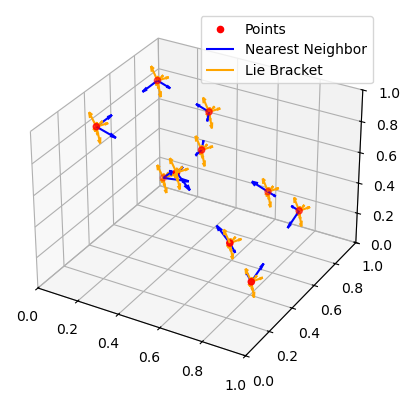

(10, 3) (10, 2, 3) (8, 3)


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance

def generate_points(num_points=10):
    return np.random.rand(num_points, 3)

def find_nearest_neighbors(points, k=2):
    dist_matrix = distance.cdist(points, points, 'euclidean')
    np.fill_diagonal(dist_matrix, np.inf)
    indices = np.argsort(dist_matrix, axis=1)[:, :k]
    return indices

def compute_vectors(points, neighbors):
    vectors = []
    for i, point in enumerate(points):
        nearest_points = points[neighbors[i]]
        vecs = nearest_points - point
        vectors.append(vecs)
    return np.array(vectors)

def lie_bracket(A, B):
    return A @ B - B @ A

def skew_symmetric(v):
    return np.array([
        [0, -v[2], v[1]],
        [v[2], 0, -v[0]],
        [-v[1], v[0], 0]
    ])

def visualize_with_vectors(points, vectors, lie_bracket_vectors):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot points
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='r', label='Points')
    
    vector_length = 0.25  # Make vectors slightly longer for better visibility

    for i, point in enumerate(points):
        # Plot nearest neighbor vectors (in blue)
        for vec in vectors[i]:
            ax.quiver(point[0], point[1], point[2], vec[0], vec[1], vec[2], color='b', length=vector_length, label='Nearest Neighbor' if i == 0 else "")
        
        # Plot Lie bracket vectors (in orange)
        for vec in lie_bracket_vectors:
            ax.quiver(point[0], point[1], point[2], vec[0], vec[1], vec[2], color='orange', length=vector_length, label='Lie Bracket' if i == 0 else "")

    # Adding legend to differentiate vector types
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

    # Setting axis limits for better visibility
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    plt.show()

# Generate Points
points = generate_points()
print("Generated Points:\n", points)

# Find Nearest Points and Compute Vectors
neighbors = find_nearest_neighbors(points)
vectors = compute_vectors(points, neighbors)
# print(points.shape, neighbors.shape, vectors.shape)  #(10, 3) (10, 2) (10, 2, 3)

# Matrix Generators for sl(3)
H1 = np.array([[ 1,  0,  0],
               [ 0, -1,  0],
               [ 0,  0,  0]])

H2 = np.array([[ 0,  0,  0],
               [ 0,  1,  0],
               [ 0,  0, -1]])

E12 = np.array([[ 0,  1,  0],
                [ 0,  0,  0],
                [ 0,  0,  0]])

E13 = np.array([[ 0,  0,  1],
                [ 0,  0,  0],
                [ 0,  0,  0]])

E23 = np.array([[ 0,  0,  0],
                [ 0,  0,  1],
                [ 0,  0,  0]])

generators = [H1, H2, E12, E13, E23]

# Compute initial Lie bracket to get the starting 3 vectors
def compute_initial_vectors(vectors):
    for i, vec_set in enumerate(vectors):
        v1, v2 = vec_set[0], vec_set[1]
        mat_v1 = skew_symmetric(v1)
        mat_v2 = skew_symmetric(v2)
        mat_v3 = lie_bracket(mat_v1, mat_v2)
        # Return the initial 3 matrices
        print()
        return [mat_v1, mat_v2, mat_v3]
    return []

# Initial vectors
initial_vectors = compute_initial_vectors(vectors)
basis = initial_vectors.copy()
print("b: ", vectors.shape, np.array(basis).shape)  #(10, 2, 3) (3, 3, 3)

# Ensure exactly 8 vectors in the basis
while len(basis) < 8:
    new_vectors = []
    for gen in generators:
        for b in basis.copy():  # Copy to avoid modifying the list during iteration
            if len(basis) >= 8:
                break
            lie_bracket_res = lie_bracket(b, gen)
            if lie_bracket_res.any():  # Make sure we're not adding zero matrices
                temp_basis = basis + [lie_bracket_res]
                temp_matrix = np.array([v.flatten() for v in temp_basis]).T
                if np.linalg.matrix_rank(temp_matrix) > len(basis):
                    basis.append(lie_bracket_res)
        if len(basis) >= 8:
            break

# Verify the basis spans sl(3)
basis_matrix = np.array([b.flatten() for b in basis]).T
rank = np.linalg.matrix_rank(basis_matrix)
print("\nBasis Matrix (first 8 vectors):\n", basis_matrix)
print(f"\nRank of the Basis Matrix: {rank} (Expected: 8 for a full basis of sl(3))")

# Convert the basis to vectors for visualization
lie_bracket_vectors = [b.flatten()[:3] for b in basis]  # Simplifying for visualization
visualize_with_vectors(points, vectors, lie_bracket_vectors)
print(points.shape, vectors.shape, np.array(lie_bracket_vectors).shape)
print(basis[0], basis_matrix[0], lie_bracket_vectors.shape)


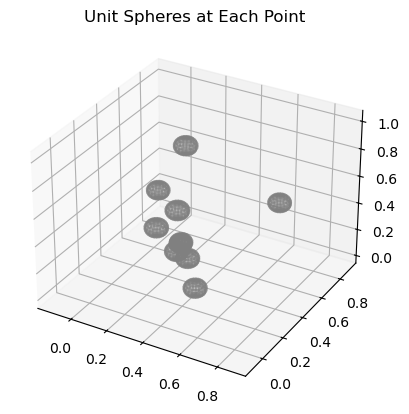

0
1
2
3
4
5
6
7
0
1


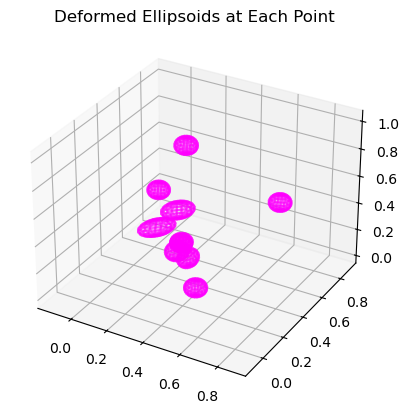

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance
from scipy.linalg import expm

def generate_points(num_points=10):
    return np.random.rand(num_points, 3)

def find_nearest_neighbors(points, k=2):
    dist_matrix = distance.cdist(points, points, 'euclidean')
    np.fill_diagonal(dist_matrix, np.inf)
    indices = np.argsort(dist_matrix, axis=1)[:, :k]
    return indices

def compute_vectors(points, neighbors):
    vectors = []
    for i, point in enumerate(points):
        nearest_points = points[neighbors[i]]
        vecs = nearest_points - point
        vectors.append(vecs)
    return np.array(vectors)

def lie_bracket(A, B):
    return A @ B - B @ A

def skew_symmetric(v):
    return np.array([
        [0, -v[2], v[1]],
        [v[2], 0, -v[0]],
        [-v[1], v[0], 0]
    ])

def plot_unit_spheres(ax, points, scale_factor=0.1):
    for point in points:
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = np.cos(u) * np.sin(v)
        y = np.sin(u) * np.sin(v)
        z = np.cos(v)
        ax.plot_wireframe(point[0] + scale_factor * x, point[1] + scale_factor * y, point[2] + scale_factor * z, color="grey", alpha=0.5)

def plot_deformed_ellipsoids(ax, points, transformations, scale_factor=0.1):
    for i, point in enumerate(points):
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = np.cos(u) * np.sin(v)
        y = np.sin(u) * np.sin(v)
        z = np.cos(v)
        sphere_points = np.vstack((x.flatten(), y.flatten(), z.flatten())) * scale_factor
        print(i % len(transformations))
        deformed_points = transformations[i % len(transformations)] @ sphere_points
        deformed_points = deformed_points.reshape(3, u.shape[0], u.shape[1])
        
        ax.plot_wireframe(point[0] + deformed_points[0], point[1] + deformed_points[1], point[2] + deformed_points[2], color="magenta", alpha=0.5)

def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.  This is one possible solution to Matplotlib's ax.set_aspect('equal') and ax.axis('equal') not working for 3D.'''
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    plot_radius = 0.5 * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

# Generate Points
points = generate_points()
# print("Generated Points:\n", points)

# Find Nearest Points and Compute Vectors
neighbors = find_nearest_neighbors(points)
vectors = compute_vectors(points, neighbors)

# Matrix Generators for sl(3)
H1 = np.array([[ 1,  0,  0],
               [ 0, -1,  0],
               [ 0,  0,  0]])

H2 = np.array([[ 0,  0,  0],
               [ 0,  1,  0],
               [ 0,  0, -1]])

E12 = np.array([[ 0,  1,  0],
                [ 0,  0,  0],
                [ 0,  0,  0]])

E13 = np.array([[ 0,  0,  1],
                [ 0,  0,  0],
                [ 0,  0,  0]])

E23 = np.array([[ 0,  0,  0],
                [ 0,  0,  1],
                [ 0,  0,  0]])

generators = [H1, H2, E12, E13, E23]

# Compute initial Lie bracket to get the starting 3 vectors
def compute_initial_vectors(vectors):
    for i, vec_set in enumerate(vectors):
        v1, v2 = vec_set[0], vec_set[1]
        mat_v1 = skew_symmetric(v1)
        mat_v2 = skew_symmetric(v2)
        mat_v3 = lie_bracket(mat_v1, mat_v2)
        # Return the initial 3 matrices
        return [mat_v1, mat_v2, mat_v3]
    return []

# Initial vectors
initial_vectors = compute_initial_vectors(vectors)
basis = initial_vectors.copy()

# Ensure exactly 8 vectors in the basis
while len(basis) < 8:
    new_vectors = []
    for gen in generators:
        for b in basis.copy():  # Copy to avoid modifying the list during iteration
            if len(basis) >= 8:
                break
            lie_bracket_res = lie_bracket(b, gen)
            if lie_bracket_res.any():  # Make sure we're not adding zero matrices
                temp_basis = basis + [lie_bracket_res]
                temp_matrix = np.array([v.flatten() for v in temp_basis]).T
                if np.linalg.matrix_rank(temp_matrix) > len(basis):
                    basis.append(lie_bracket_res)
        if len(basis) >= 8:
            break

# Verify the basis spans sl(3)
basis_matrix = np.array([b.flatten() for b in basis]).T
rank = np.linalg.matrix_rank(basis_matrix)

# print("\nBasis Matrix (first 8 vectors):\n", basis_matrix)
# print(f"\nRank of the Basis Matrix: {rank} (Expected: 8 for a full basis of sl(3))")

# Convert basis vectors to matrices and exponential form for SL(3) transformations
transformations = [expm(basis[i]) for i in range(8)]
# print("transformation:")
# print(np.array(transformations).shape)   #(8, 3, 3)

# Determine the scale factor based on the point cloud
point_range = np.ptp(points, axis=0)
scale_factor = np.min(point_range) / 10  # Adjust as needed

# Visualize unit spheres at each point
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_unit_spheres(ax, points, scale_factor)
set_axes_equal(ax)
ax.set_title("Unit Spheres at Each Point")
plt.show()

# Visualize deformed ellipsoids at each point after SL(3) transformations
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_deformed_ellipsoids(ax, points, transformations, scale_factor)
set_axes_equal(ax)
ax.set_title("Deformed Ellipsoids at Each Point")
plt.show()